### Notebook for running SCOT on SNARE-seq Cell Mixture Data

**Access to the raw dataset:** Gene Expression Omnibus accession no. GSE126074. 
SNARE-seq data in `/data` folder containes the version with dimensionality reduction techniques applied from the original SNARE-seq paper (https://www.nature.com/articles/s41587-019-0290-0). Namely, PCA for gene expression (scRNA-seq) domain with 10 components, and LDA with 19 topics for chromatin accessibility (snATAC-seq) domain using cisTopic package in R. Below, we replicate our results for the SNARE-seq dataset reported in ["Gromov-Wasserstein optimal transport to align single-cell multi-omics data"](https://www.biorxiv.org/content/10.1101/2020.04.28.066787v2). 


If you have any questions, e-mail: ritambhara@brown.edu, pinar_demetci@brown.edu, rebecca_santorella@brown.edu  

In [1]:
import numpy as np

In [2]:
import sys
sys.path.insert(1, '../src/')
from scot import *


In [3]:
X=np.load("../data/scatac_feat.npy") 
y=np.load("../data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


In [4]:
X

array([[60197.,  6248.,  4661., ..., 47172.,  4581., 38815.],
       [66853.,  5991., 77816., ...,  2792., 19038.,  1547.],
       [13579.,  1527.,  1360., ...,  2404.,  1607.,  2412.],
       ...,
       [26790.,  3789.,  5076., ...,  1845.,  2987.,  1953.],
       [10934.,  1848., 16540., ...,  1156.,  2437.,   938.],
       [83110., 12502., 45698., ...,  7958., 22743.,  3810.]])

In [5]:
y

array([[  6.6883364 ,  -2.3696006 ,   2.14278082, ...,  -0.38985914,
          0.03180685,   0.16824296],
       [ -1.64704263,   3.87629104,  -2.57201982, ...,  -0.56939318,
          0.77513025,   0.40657076],
       [ -3.22729615,   4.55422489, -10.10911411, ...,  -0.50277229,
          0.11965411,   0.70274427],
       ...,
       [ -2.60360565,   3.75489872,  -6.05216412, ...,   0.24619445,
         -1.72947077,  -3.24436   ],
       [ -0.94623495,   4.54416359,   2.29832621, ...,   2.12374688,
         -1.05837995,   0.42656378],
       [ -2.49249336,   4.43299686,   1.91649138, ...,   1.89995418,
         -2.62129623,   4.05023675]])

In [6]:
scot = SCOT(X,y)



In [7]:
scot.normalize(norm="l2")

In [8]:
scot.X

array([[0.62526029, 0.06489736, 0.04841335, ..., 0.4899709 , 0.04758239,
        0.40316757],
       [0.47035942, 0.04215104, 0.54749209, ..., 0.01964375, 0.13394616,
        0.01088427],
       [0.74883779, 0.0842091 , 0.07499959, ..., 0.1325728 , 0.08862084,
        0.13301397],
       ...,
       [0.42045282, 0.05946606, 0.07966475, ..., 0.02895616, 0.04687916,
        0.03065115],
       [0.48609617, 0.0821571 , 0.73532382, ..., 0.05139264, 0.10834245,
        0.04170095],
       [0.50659559, 0.07620573, 0.27855138, ..., 0.04850785, 0.13862957,
        0.02322379]])

In [9]:
scot.y

array([[ 0.89765423, -0.31802856,  0.28758665, ..., -0.05232373,
         0.00426886,  0.0225802 ],
       [-0.32220528,  0.75830548, -0.50315539, ..., -0.11138843,
         0.15163606,  0.07953604],
       [-0.27824717,  0.39265074, -0.87157556, ..., -0.04334742,
         0.0103162 ,  0.06058837],
       ...,
       [-0.25965798,  0.37447661, -0.60358324, ...,  0.02455301,
        -0.17248038, -0.32356051],
       [-0.14594818,  0.7008961 ,  0.35449601, ...,  0.32756873,
        -0.16324553,  0.0657936 ],
       [-0.30215984,  0.53740309,  0.23233231, ...,  0.23032754,
        -0.31777435,  0.49100187]])

In [10]:
X_graph, y_graph = scot.construct_graph(k=110)

In [11]:
X_graph

<1047x1047 sparse matrix of type '<class 'numpy.float64'>'
	with 115170 stored elements in Compressed Sparse Row format>

In [12]:
y_graph

<1047x1047 sparse matrix of type '<class 'numpy.float64'>'
	with 115170 stored elements in Compressed Sparse Row format>

In [13]:
X_graph.shape

(1047, 1047)

In [14]:
y_graph.shape

(1047, 1047)

In [15]:
X_graph.max()

1.0

In [16]:
y_graph.max()

1.0

In [17]:
D1, D2 = scot.init_distances()

In [18]:
D1

array([[0.        , 0.83333333, 0.5       , ..., 0.66666667, 0.83333333,
        0.66666667],
       [0.83333333, 0.        , 0.5       , ..., 0.5       , 0.16666667,
        0.33333333],
       [0.5       , 0.5       , 0.        , ..., 0.33333333, 0.5       ,
        0.33333333],
       ...,
       [0.66666667, 0.5       , 0.33333333, ..., 0.        , 0.5       ,
        0.5       ],
       [0.83333333, 0.16666667, 0.5       , ..., 0.5       , 0.        ,
        0.33333333],
       [0.66666667, 0.33333333, 0.33333333, ..., 0.5       , 0.33333333,
        0.        ]])

In [19]:
D2

array([[0.  , 1.  , 1.  , ..., 1.  , 0.75, 0.75],
       [1.  , 0.  , 0.25, ..., 0.25, 0.5 , 0.5 ],
       [1.  , 0.25, 0.  , ..., 0.25, 0.5 , 0.5 ],
       ...,
       [1.  , 0.25, 0.25, ..., 0.  , 0.75, 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.75, 0.  , 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.  ]])

In [20]:
p = ot.unif(X.shape[0])
q = ot.unif(y.shape[0])

In [21]:
print(p)
print('')
print(q)

[0.00095511 0.00095511 0.00095511 ... 0.00095511 0.00095511 0.00095511]

[0.00095511 0.00095511 0.00095511 ... 0.00095511 0.00095511 0.00095511]


In [22]:
coupling, log= ot.gromov.entropic_gromov_wasserstein(D1, D2, p, q, loss_fun='square_loss', epsilon=1e-3, log=True, verbose=True)
gwdist=log['gw_dist']


It.  |Err         
-------------------
    0|1.758021e-03|


/Users/thnguy22/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.650066e-04|
   20|5.551472e-05|
   30|1.489434e-05|
   40|4.868141e-06|
   50|1.787543e-06|
   60|7.141842e-07|
   70|3.011861e-07|
   80|1.308225e-07|
   90|5.766123e-08|
  100|2.559230e-08|
  110|1.139643e-08|
  120|5.083008e-09|
  130|2.268915e-09|
  140|1.013200e-09|
  150|4.525532e-10|


In [23]:
distance = ot.gromov.entropic_gromov_wasserstein2(D1, D2, p, q, loss_fun = 'square_loss', epsilon=1e-3)
print('distance:', distance)

distance: 0.037038665747357084


In [24]:
# initialize SCOT object
original_scot=SCOT(X, y)
# call the alignment with l2 normalization 
# A few hyperparameter combinations yield the best result (FOSCTTM ~0.149) and one of them is the following:
X_new, y_new = original_scot.align(k=110, e=1e-3,  normalize=True, norm="l2")

It.  |Err         
-------------------
    0|1.758021e-03|


/Users/thnguy22/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.650066e-04|
   20|5.551472e-05|
   30|1.489434e-05|
   40|4.868141e-06|
   50|1.787543e-06|
   60|7.141842e-07|
   70|3.011861e-07|
   80|1.308225e-07|
   90|5.766123e-08|
  100|2.559230e-08|
  110|1.139643e-08|
  120|5.083008e-09|
  130|2.268915e-09|
  140|1.013200e-09|
  150|4.525532e-10|


In [25]:
X_new.shape

(1047, 10)

In [26]:
y_new.shape

(1047, 10)

##### Evaluate results:

In [27]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.14963585296056656


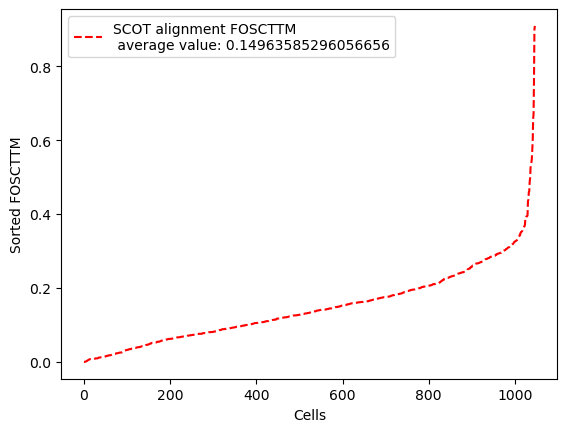

In [28]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

##### Visualize Projections

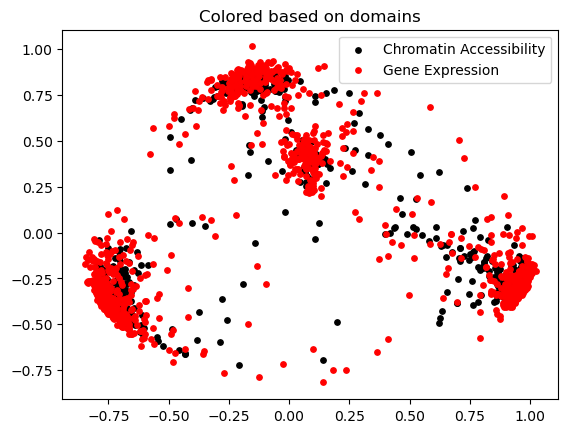

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca=Xy_pca[0: 1047,]
y_pca=Xy_pca[1047:,]

#Plot aligned domains, samples colored by domain identity:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.legend()
plt.title("Colored based on domains")
plt.show()

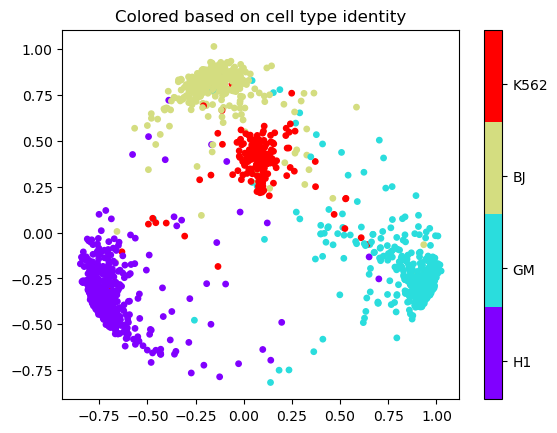

In [30]:
#Plot aligned domains, samples colored by cell types:
cellTypes_atac=np.loadtxt("../data/SNAREseq_atac_types.txt")
cellTypes_rna=np.loadtxt("../data/SNAREseq_rna_types.txt")

colormap = plt.get_cmap('rainbow', 4) 
plt.scatter(X_pca[:,0], X_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
plt.scatter(y_pca[:,0], y_pca[:,1], c=cellTypes_rna, s=15, cmap=colormap)
# plt.colorbar()
cbar=plt.colorbar()

# approximately center the colors on the colorbar when adding cell type labels
tick_locs = (np.arange(1,5)+0.75) *3/4 
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels
plt.title("Colored based on cell type identity")
plt.show()



#### Compare alignment visualization with the original domains *before* the alignment

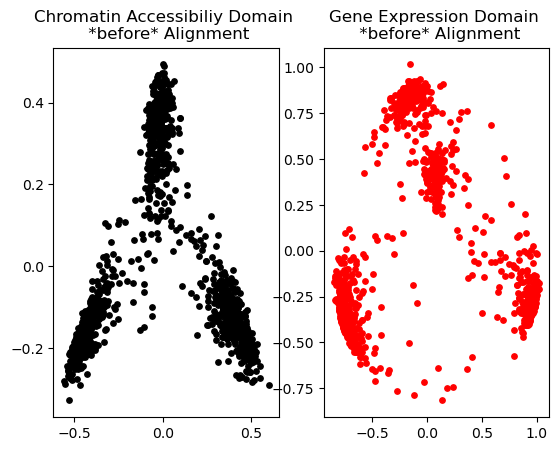

In [31]:
originalX_pca=pca.fit_transform(original_scot.X)
originaly_pca=pca.fit_transform(original_scot.y)

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
ax2.set_title("Gene Expression Domain \n *before* Alignment")
plt.show()

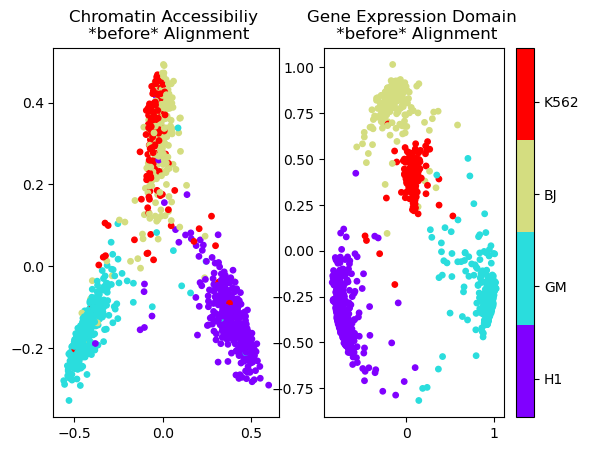

In [32]:
#Visualization of the cell type clusters in original domains *before* alignment
fig, (ax1, ax2)= plt.subplots(1,2)

fig1= ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
ax1.set_title("Chromatin Accessibiliy \n *before* Alignment")

fig2= ax2.scatter(originaly_pca[:,0], originaly_pca[:,1],  c=cellTypes_rna, s=15, cmap=colormap)
ax2.set_title("Gene Expression Domain \n *before* Alignment")

cbar=fig.colorbar(fig2)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels